In [6]:
import pandas as pd
import numpy as np
df = pd.read_csv('HY_Universe_corporate bond.csv')
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [43]:
df.dtypes

CUSIP                          object
Ticker                         object
Issue Date                     object
Maturity                       object
1st Call Date                  object
Moodys                         object
S_and_P                        object
Fitch                          object
Bloomberg Composite Rating     object
Coupon                        float64
Issued Amount                 float64
Maturity Type                  object
Coupon Type                    object
Maturity At Issue months      float64
Industry                       object
LiquidityScore                float64
Months in JNK                  object
Months in HYG                  object
Months in Both                 object
IN_ETF                         object
LIQ SCORE                     float64
n_trades                        int64
volume_trades                 float64
total_median_size             float64
total_mean_size               float64
n_days_trade                    int64
days_diff_ma

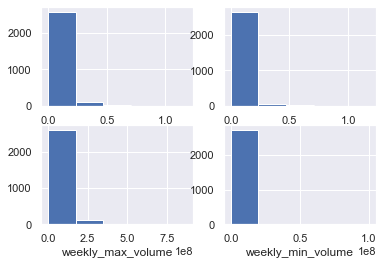

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.subplot(2,2,1)
_ = plt.hist(df['weekly_mean_volume'], bins = 5)
plt.xlabel('weekly_mean_volume')
plt.subplot(2,2,2)
_ = plt.hist(df['weekly_median_volume'], bins = 5)
plt.xlabel('weekly_median_volume')
plt.subplot(2,2,3)
_ = plt.hist(df['weekly_max_volume'], bins = 5)
plt.xlabel('weekly_max_volume')
plt.subplot(2,2,4)
_ = plt.hist(df['weekly_min_volume'], bins = 5)
plt.xlabel('weekly_min_volume')
plt.show()



KeyboardInterrupt: 

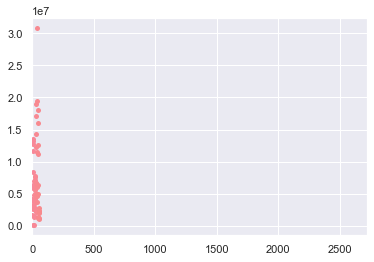

In [33]:
sns.set()
df['CUSIP'] = df['CUSIP'].astype(str)
_ = sns.swarmplot(x = df['CUSIP'], y = df["weekly_mean_volume"])
_ = plt.xlabel('Ticker')
_ = plt.ylabel('weekly_mean_volume')
plt.show()

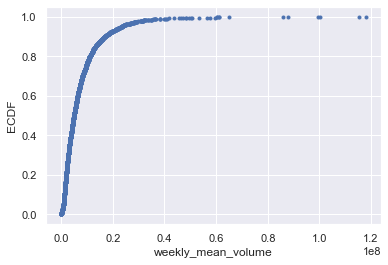

In [16]:
def ecdf(data):
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data) 

    # y-data for the ECDF: y
    y = np.arange(1, n+1)/n

    return x, y
x_weekly_mean_volume, y_weekly_mean_volume = ecdf(df['weekly_mean_volume'])

# Generate plot
plt.plot(x_weekly_mean_volume, y_weekly_mean_volume, marker = '.', linestyle = 'none')

# Label the axes
plt.xlabel('weekly_mean_volume')
plt.ylabel('ECDF')

# Display the plot
plt.show()

In [12]:
mean_weekly_mean_volume = np.mean(df['weekly_mean_volume'])
std_weekly_mean_volume = np.std(df['weekly_mean_volume'])
print(mean_weekly_mean_volume)
print(std_weekly_mean_volume)

7588325.177168999
8977660.409965903


In [15]:
percentiles_weekly_mean_volume = np.percentile(df['weekly_mean_volume'], [25, 50, 75])
print(percentiles_weekly_mean_volume)

[2295272.727 4926339.286 9649298.969]


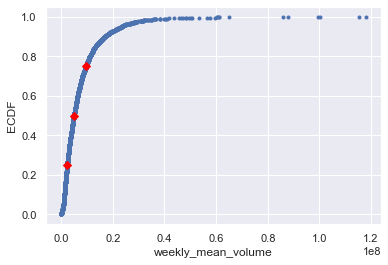

In [20]:
_ = plt.plot(x_weekly_mean_volume, y_weekly_mean_volume, '.')
_ = plt.xlabel('weekly_mean_volume')
_ = plt.ylabel('ECDF')

_ = plt.plot(percentiles_weekly_mean_volume,[0.25, 0.50, 0.75], marker='D', color='red',
         linestyle = 'none')

plt.show()

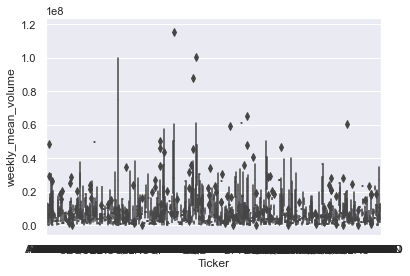

In [40]:
_ = sns.boxplot(x =df[ 'Ticker'].astype(str), y = df['weekly_mean_volume'])

_ = plt.xlabel('Ticker')
_ = plt.ylabel('weekly_mean_volume')

plt.show()

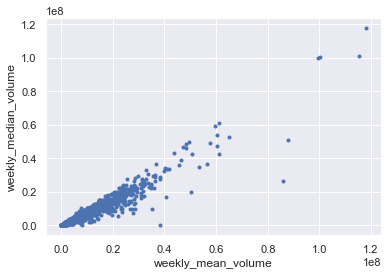

In [41]:
_ = plt.plot(df['weekly_mean_volume'], df['weekly_median_volume'], marker = '.', linestyle = 'none')
_ = plt.xlabel('weekly_mean_volume')
_ = plt.ylabel('weekly_median_volume')
plt.show()

In [43]:
covariance_matrix = np.cov(df['weekly_mean_volume'], df['weekly_median_volume'])

print(covariance_matrix)
print('covariance =', covariance_matrix[0,1])

[[8.06280182e+13 6.30595086e+13]
 [6.30595086e+13 5.38803080e+13]]
covariance = 63059508554077.68


In [44]:
corr_matrix = np.corrcoef(df['weekly_mean_volume'], df['weekly_median_volume'])
print(corr_matrix)
print('Pearson correlation coefficient =', corr_matrix[0,1])

[[1.         0.95673697]
 [0.95673697 1.        ]]
Pearson correlation coefficient = 0.9567369663136264


In [45]:
print("My name is Junye Qiu")
print("My NetID is: junyeq2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Junye Qiu
My NetID is: junyeq2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
